In [1]:
import numpy as np
import pandas as pd
import os
from scipy.integrate import cumulative_trapezoid, trapezoid
from scipy.integrate import dblquad

In [40]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

def low_pass_filter(x):
    g = np.append(0., x[:-1])
    g = 0.9 * g + 0.1 * x
    return x - g

In [3]:
%matplotlib inline

In [4]:
sequence_dir = "data/DatasetV1/Sequence/03"

accel_path = os.path.join(sequence_dir, "accelerometer.csv")
gyro_path = os.path.join(sequence_dir, "gyroscope.csv")

In [41]:
accel_df = pd.read_csv(accel_path, index_col=0)

accel_df.iloc[:, 1:] = accel_df.iloc[:, 1:].apply(lambda x: moving_average(x, 3), axis=0)
accel_df.set_index("t", inplace=True)

accel_df["et"] = (accel_df.index - accel_df.index[0]) / 10 ** 9
accel_df.drop_duplicates("et", keep="last", inplace=True)

In [44]:
accel_df = pd.read_csv(accel_path, index_col=0)

global_a = pd.DataFrame([[0, 0, 0, 0]], columns=["t", "x", "y", "z"])

accel_df = pd.concat((global_a, accel_df))
accel_df.set_index("t", inplace=True)

accel_df.iloc[:, 1:] = accel_df.iloc[:, 1:].apply(lambda x: low_pass_filter(x), axis=0)

# accel_df["et"] = (accel_df.index - accel_df.index[0]) / 10 ** 9
# accel_df.drop_duplicates("et", keep="last", inplace=True)

<AxesSubplot:xlabel='t'>

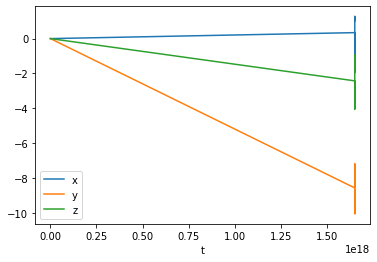

In [45]:
accel_df.plot()

In [37]:
accel_df["vx"] = cumulative_trapezoid(accel_df["x"], accel_df["et"], initial=0)
accel_df["vy"] = cumulative_trapezoid(accel_df["y"], accel_df["et"], initial=0)
accel_df["vz"] = cumulative_trapezoid(accel_df["z"], accel_df["et"], initial=0)

accel_df["dx"] = cumulative_trapezoid(accel_df["vx"], accel_df["et"], initial=0)
accel_df["dy"] = cumulative_trapezoid(accel_df["vy"], accel_df["et"], initial=0)
accel_df["dz"] = cumulative_trapezoid(accel_df["vz"], accel_df["et"], initial=0)

In [38]:
distance_df = accel_df.iloc[:, 7:]

<AxesSubplot:xlabel='t'>

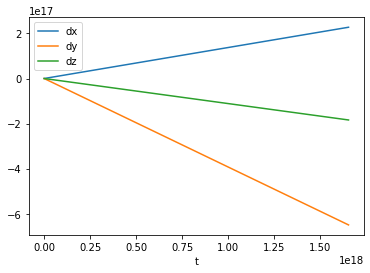

In [39]:
distance_df.plot()

In [198]:
  accel_df = pd.read_csv(accel_path, index_col=0)

accel_df.iloc[:, 1:] = accel_df.iloc[:, 1:].apply(lambda x: moving_average(x, 3), axis=0)

accel_df.drop_duplicates("t", keep="last", inplace=True)
accel_df.reset_index(drop=True, inplace=True)
accel_df.set_index("t", inplace=True)

accel_df["et"] = (accel_df.index - accel_df.index[0]) / 10 ** 9

In [199]:
accel_df.loc[:, "a"] = np.sqrt(accel_df.x ** 2 + accel_df.y ** 2 + accel_df.z ** 2)

In [200]:
accel_df.a = accel_df.a - 9.8 # accel_df.a.mean()

In [201]:
accel_df["v"] = cumulative_trapezoid(accel_df["a"], accel_df["et"], initial=0)
accel_df["d"] = cumulative_trapezoid(accel_df["v"], accel_df["et"], initial=0)

<AxesSubplot:xlabel='t'>

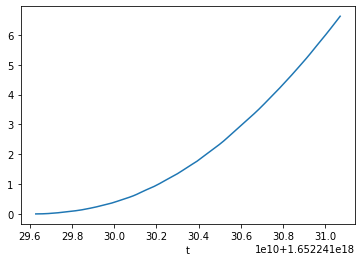

In [202]:
accel_df.d.plot()

In [192]:
gyro_df = pd.read_csv(gyro_path, index_col=0)

gyro_df.iloc[:, 1:] = gyro_df.iloc[:, 1:].apply(lambda x: moving_average(x, 3), axis=0)

gyro_df.drop_duplicates("t", keep="last", inplace=True)
gyro_df.reset_index(drop=True, inplace=True)
gyro_df.set_index("t", inplace=True)

gyro_df["et"] = (gyro_df.index - gyro_df.index[0]) / 10 ** 9

In [193]:
gyro_df["ax"] = cumulative_trapezoid(gyro_df["x"], gyro_df["et"], initial=0)
gyro_df["ay"] = cumulative_trapezoid(gyro_df["y"], gyro_df["et"], initial=0)
gyro_df["az"] = cumulative_trapezoid(gyro_df["z"], gyro_df["et"], initial=0)

In [194]:
angle_df = gyro_df.iloc[:, 4:]

<AxesSubplot:xlabel='t'>

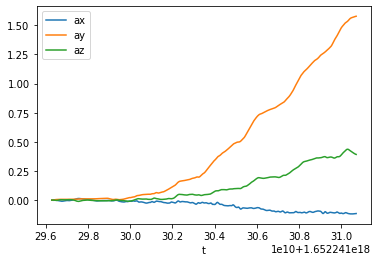

In [195]:
angle_df.plot()

In [196]:
gyro_df.loc[:, "w"] = np.sqrt(gyro_df.x ** 2 + gyro_df.y ** 2 + gyro_df.z ** 2)
gyro_df.loc[:, "a"] = cumulative_trapezoid(gyro_df["w"], gyro_df["et"], initial=0)

<AxesSubplot:xlabel='et'>

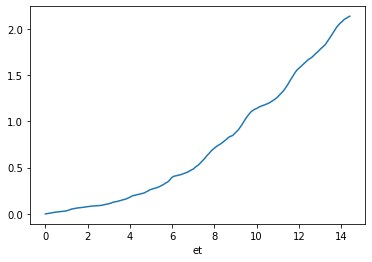

In [197]:
gyro_df.set_index("et", drop=True).a.plot()